In [52]:
import numpy as np
import matplotlib.pyplot as plt

### 一张图片RGB三层通道顺序堆叠在一起形成一个n维的向量
### n = [红，绿，蓝]
### n表示向量的维度
### $$ x ∈ R^{nx}  表示准备训练的数据维度$$
### $$ y ∈ \{{0,1}\} $$ 
### m 表示样本的数量 : $$ {(x^{(1)},y^{(1)}),(x^{(2)},y^{(2)}),（x^{(2)},y^{(2)})...(x^{(m)},y^{(m)})} $$
### 有时候也写成 M = M(train)
### $$ X=\begin{bmatrix} ... & ... & ... & ... & ... \\ X^{(1)} & X^{(2)} & X^{(3)} & ... & X^{(m)}\\ ... & ... & ... & ... & ...\end{bmatrix} $$
#### 上面这个矩阵的行是n列是m
#### 矩阵向量的定义是把样本按行排列：$$X^{T}$$
$$ X=\begin{bmatrix} ... &  X^{(1)} & ... \\ ... & X^{(2)} & ... \\ ...& ... & ... \\... & X^{(m)} & ... \end{bmatrix} $$
### 但是事实证明，神经网络中还是X更适合

## 下面开始创建一些例子来说明

In [53]:
def create_data_for_example():
  return np.mat((np.random.sample(25).reshape(5,5)*1000).astype(int))
create_data_for_example()

matrix([[982,  80, 642,  63, 201],
        [806, 667, 783, 245, 847],
        [764, 614, 138, 346, 297],
        [330, 863, 527,  38, 741],
        [419, 510, 691, 839, 596]])

In [54]:
def Xi():
  return np.ravel(create_data_for_example())
Xi()

array([479,   4, 975, 210,  13, 197,  28, 248, 691, 385, 333, 421, 772,
       667, 394, 229, 350, 161,  72, 722, 644, 448, 859, 300, 360])

## 整理样本成为X矩阵
$$ X=\begin{bmatrix} ... & ... & ... & ... & ... \\ X^{(1)} & X^{(2)} & X^{(3)} & ... & X^{(m)}\\ ... & ... & ... & ... & ...\end{bmatrix} $$

In [55]:
X = np.array([Xi() for i in range(10)])
X

array([[702, 993, 557, 950, 830, 288, 781, 308, 186, 331,  35, 298, 423,
        849, 628,  54, 362, 214, 507,  99, 586,  25, 125,   9, 944],
       [ 23, 423,  22, 742, 947, 902, 160, 416, 408, 533, 505, 255, 655,
        163, 823,   8, 493, 894, 866, 406, 829, 284, 512,  71, 613],
       [121, 536, 361, 915, 951, 556, 126, 581, 657, 833, 778, 462, 498,
        841, 278, 243, 216, 235, 546, 784, 580,  62, 951, 973, 443],
       [463, 258, 267, 257, 827, 880,  80, 411, 459, 572, 666, 798, 926,
        587, 968, 485,  94,  90, 825, 650, 136, 863, 243, 582, 715],
       [397, 367, 878, 766, 469, 988, 131, 432, 909, 166, 490, 627, 102,
         81, 342, 817, 524, 191, 867,   8, 446, 328, 323, 290, 896],
       [357, 631, 261, 213,  77, 945, 373, 117, 196, 784, 258, 849, 690,
        671, 334, 519, 752, 143, 128, 494, 224, 365, 803, 231, 140],
       [313, 703, 568, 525, 664, 718, 451, 678, 149,  57, 249, 779,  93,
        366, 627, 544, 389, 753, 982, 804, 496, 794, 872, 424, 774],
      

## 我们先拿到样本的维度也就是n行与m列，分别对应样本的每一个样本的n个特征和有m个样本

In [56]:
n , m = X.shape
n,m

(10, 25)

### 再创建一个特征矩阵Y与X样本矩阵对应
### $$  Y =\begin{bmatrix} Y^{1} & Y^{1} & ...& Y^{1} &\end{bmatrix} $$  
### $$ y ∈ \{{0,1}\} $$


In [57]:
Y = (np.random.sample(n)+0.5).astype(int)
Y

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 1])

## 2.2 logitc回归
### 可加入给定一个图片，比如是猫，
我们将图片向量化后，得到X
而图片的标签则是Y
### 我们希望得到一个算法能够得出图片是猫的概率称为Y的i帽，这个算法就是 “yhat” 表示对真实的情况下Y向量的估计
### 形式上说，yhat是预测标签Y为1的概率函数
$$ f_{yhat}(x) = P(y=1|x) $$
### 约定逻辑回归的参数是 $w$
$$ w ∈ R^{nx} $$
### 参数 $$ b $$ 是一个实数
$$ b ∈ R $$
### 在线性回归里得到yhat可以用这种方法
$$ f_{yhat}(x,w,b) = w^{T}*x+b $$




In [58]:
def h(x,w,b):
  return dot(w.T,x)+b

### 但是对分类来说，就不是一个很好的方法了因为希望yaht输出的是y为1的概率，因此，输出的值应该在0，1之间，而线性函数输出的可能是0.xxx或者比1大得多，这对概率来说就失去了意义
### 所以，我们需要一个函数，$$ sigmoid(z) $$
### $$ z = w^{T}*x+b $$
### $$ sigmoid(z) = 1/1+e^{-z} $$
### 所以函数有时候也这样写
### $$ sigmoid(x,w,b) = 1/1+e^{-(w^{T}*x+b)} $$
### 要注意的是，如果:$$abs(z)$$非常大，$$e^{-z}$$就会非常接近1,相反如果非常小就会接近于 0.然后我们就能用一个判定函数轻松的对yhat的结果进行分类 譬如阈值设置在0.5
## 所以:
## 在逻辑回归时，其实就是在学习参数:$$ w 和 b $$,得到合适的wb就能很好的估计y等于1的概率
#### $$值得注意的是，在神经网络中，我们将参数 w 和 b 分开看待，b 对应的是一个偏置量。在另一些课程中，定义了额外的特征x_0并且让 x_{0} = 1 因此x的维度变成了n_{x+1} $$
$$ x => x^{n+1}$$
### 然后定义的yhat函数就变成了$$ sigmoid(\theta^{T}*X) 在这里有一个 \theta向量 :\theta_0....\theta_{nx}  \theta 参数取代了 b 这是一个实数 \theta_0....\theta_{nx} 则是替代了参数 w  $$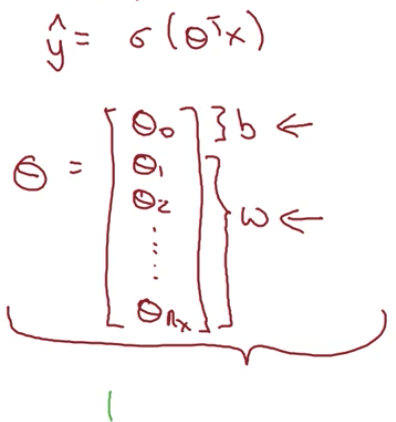 

In [59]:
def sigmoid(z):
  return 1/1+np.exp(-z)


### 要理解sigmoid函数，首先明白线性特征归一化的函数为:
### $$ X_{norm} = X-X_{min}/X_{max}-X_{min} $$ 
### $$ 1.X-X_{min} 得到当前值的Y轴去掉截距的水平高度 $$
### $$ 2.X_{max}-X_{min}得到数据集的极差，当 X-X_{min} 除以当前数据集的极差，也就显示了当前 X_{}在数据集里的高度分位，也就是X_i在Y轴高度的比例。$$


### 而sigmoid之所以可以表示的$$X_{i}$$是X矩阵的概率归一化的原因是：
#### $$ 概率的整体密度是1,X向量 作为常数的指数向量的时候，得到就是函数的整体在Y轴的反向比例 $$

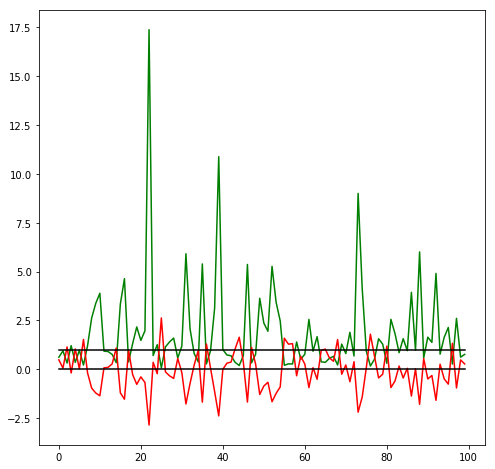

In [60]:
exampleX = (np.random.randn(100))
plt.figure(figsize=(8,8))
plt.plot(np.exp(-exampleX),c='g')
plt.plot(exampleX,c='r')
plt.plot(np.zeros_like(exampleX),'black')
plt.plot(np.ones_like(exampleX),'black')

## 当$$ 1+e^{X} $$ 时，可以消除比例相反的问题 

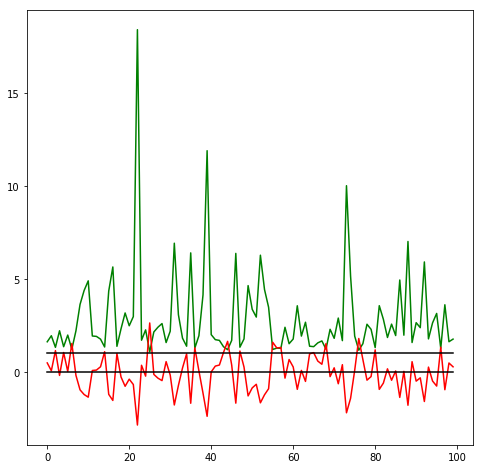

In [61]:
plt.figure(figsize=(8,8))
plt.plot(1+np.exp(-exampleX),c='g')
plt.plot(exampleX,c='r')
plt.plot(np.zeros_like(exampleX),'black')
plt.plot(np.ones_like(exampleX),'black')

## 所以用 $$ 1/1+e^{X} $$ 就可以得到向量的概率归一化,yhat的值在正负1之间

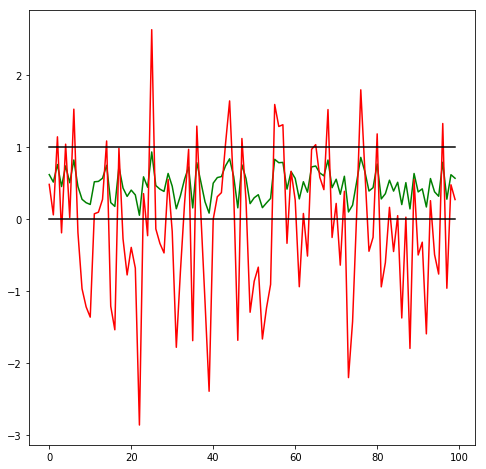

In [62]:
plt.figure(figsize=(8,8))
plt.plot(1/(1+np.exp(-exampleX)),c='g')
plt.plot(exampleX,c='r')
plt.plot(np.zeros_like(exampleX),'black')
plt.plot(np.ones_like(exampleX),'black')

### 用一个序列函数则可以更好的表明它

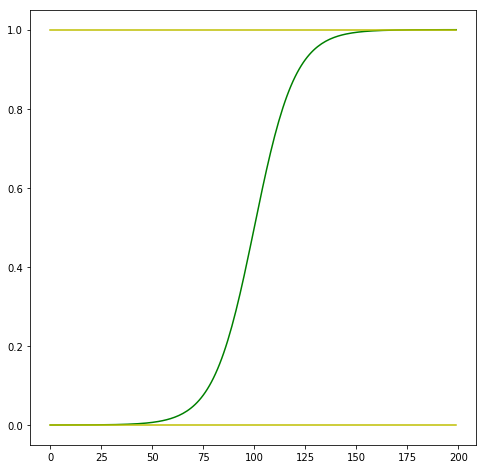

In [63]:
examplearray = np.arange(-10,10,0.1)
plt.figure(figsize=(8,8))
plt.plot(1/(1+np.exp(-examplearray)),c='g')
plt.plot(np.zeros_like(examplearray),'y')
plt.plot(np.ones_like(examplearray),'y')

## 定义损失函数
### $$ 回忆一下线性回归的损失函数 : loss(y^,y) = 1/2(y^,y)^{2} $$
### 这是一个平方误差函数 其中的期望函数 : 
### $$ y^ = h_\theta(X) = X_0 * \theta_0 + X_1 * \theta_1 ...... X_n * \theta_n ,本质上就是一个去掉斜率k的直线 $$

In [64]:
srcX = np.linspace(-10,10,1000).reshape(100,10)
srcY = np.linspace(0,0,100)
srcX.shape,srcY.shape

((100, 10), (100,))

## 梯度函数
梯度下降公式： $$ \theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m}(h_\theta(x^{(i)}) - y^{(i)}) \cdot x_j^{(i)} $$
$ x_j^{(i)} : m*1 $ 即所有样本的第j列<br/>
$ h_\theta(x^{(i)}) - y^{(i)} : m * 1 $



#实现梯度下降线性回归:
### 1.1数据标准化

### 1.2 数据预处理（标准化，X矩阵生成）

### 1.3 线性假设函数

### 1.4损失函数

## 梯度下降线性回归算法测试:
### 2.1*数据预处理*

### 2.2 设定参数并调用函数



### 2.3 绘制下降过程图

Linear regression is complete.
[235.985628] 127


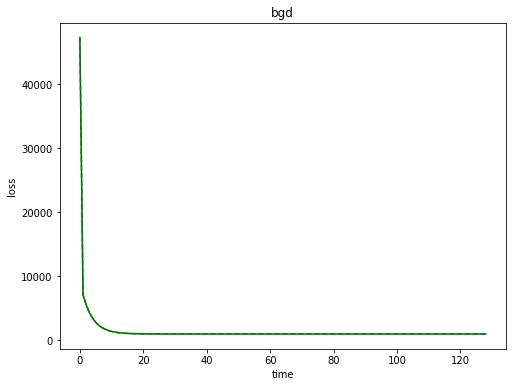

array([[-0.50331285, -0.52262577],
       [-0.41377247,  0.59389292],
       [-0.62288038, -0.52262577],
       [-0.78410717, -0.52262577],
       [-0.16489889,  0.59389292],
       [-0.68185259, -0.52262577],
       [ 0.25926825,  0.59389292],
       [ 0.88199323,  0.59389292],
       [ 0.45566197, -0.52262577],
       [-0.93992367, -0.52262577]])

In [65]:
import numpy as np

class linear:

    def __init__(self,srcX,srcY
                 ,alpha=1
                 ,maxloop=5000
                 ,epsilon = 0
                 ,data=None):
        self.srcX = srcX
        self.srcY = srcY
        self.alpha = alpha
        self.maxloop = maxloop
        self.epsilon = epsilon
        self.data = data

    def standarize(self,X):
        m, n = X.shape
        values = {}
        for j in range(n):
            features = X[:,j]
            meanVal = features.mean(axis=0)
            stdVal = features.std(axis=0)
            values[j] = [meanVal, stdVal]
            if stdVal != 0:
                X[:,j] = (features - meanVal) / stdVal
            else:
                X[:,j] = 0
        return X, values

    def data_processing(self):
        normalizedX ,normalizedValue = self.standarize(self.srcX)
        x = np.c_[np.ones(self.srcX.shape[0]),normalizedX]
        return x,normalizedValue,self.alpha,self.epsilon,self.maxloop

    def h(self,x,w):
        return np.dot(x,w)

    def loss(self,x,y,w):
        m = x.shape[0]
        return ((self.h(x,w)-y)**2).sum()/(2*m)

    def bgd_fit(self):
        y = self.srcY
        x,Value,alpha,epsilon,maxloop= self.data_processing()
        m,n =  x.shape
        theta = np.zeros((n,1))
        costs = [self.loss(x,y,theta)]
        losslog = [np.inf]
        thetas = []

        for i in range(maxloop):
            theta = theta - alpha * 1.0 / m * np.dot(x.T,(self.h(x,theta)-y))
            cost = self.loss(x,y,theta)
            costs.append(cost)
            lossvar = abs(costs[-2]-costs[-1])
            losslog.append(lossvar)
            thetas.append(theta)

            if lossvar <= epsilon or np.isinf(lossvar) or np.isnan(lossvar):
                reduction_standardization = np.array([Value[i] for i in Value])
                prediction=np.dot(np.r_[np.ones(1),(np.array([i for i in self.data])-reduction_standardization[:,0])/reduction_standardization[:,-1]],theta)
                return prediction,theta,reduction_standardization,costs,thetas,Value,losslog,i

    def __del__(self):
        print('Linear regression is complete.')

if __name__ == '__main__':
    import matplotlib.pyplot as plt
    X = np.array([[62.47, 2.0], [65.78, 3.0], [58.05, 2.0], [52.09, 2.0], [74.98, 3.0], [55.87, 2.0], [90.66, 3.0], [113.68, 3.0], [97.92, 2.0], [46.33, 2.0], [134.55, 3.0], [151.15, 3.0], [63.01, 2.0], [65.66, 2.0], [108.81, 3.0], [66.19, 3.0], [54.1, 2.0], [73.44, 2.0], [51.78, 2.0], [92.42, 3.0], [59.13, 2.0], [49.49, 1.0], [51.68, 2.0], [52.87, 2.0], [69.46, 2.0], [76.41, 2.0], [63.1, 2.0], [197.37, 5.0], [93.53, 3.0], [91.35, 3.0], [103.49, 3.0], [45.12, 2.0], [59.59, 2.0], [174.66, 4.0], [35.8, 1.0], [91.35, 3.0], [55.07, 2.0], [119.44, 3.0], [65.85, 2.0], [72.05, 3.0], [85.98, 3.0], [103.29, 4.0], [184.05, 5.0], [90.87, 3.0], [38.83, 1.0], [51.65, 1.0], [50.14, 1.0]])
    Y = np.array([[213.0], [226.0], [179.0], [188.0], [215.0], [152.0], [290.0], [375.0], [305.0], [166.0], [385.0], [500.0], [195.0], [200.0], [310.0], [205.0], [158.0], [270.0], [150.0], [310.0], [180.0], [200.0], [155.0], [178.0], [303.0], [250.0], [218.0], [630.0], [326.0], [310.0], [530.0], [138.0], [230.0], [560.0], [115.0], [400.0], [140.0], [547.0], [240.0], [250.0], [315.0], [330.0], [680.0], [302.0], [130.0], [162.0], [140.0]])
    linearmodule = linear(srcX=X,srcY=Y,alpha=1,maxloop=5000,epsilon = 0,data=[70,2])
    prediction,theta,reduction_standardization,costs,thetas,Value,losslog,time = linearmodule.bgd_fit()
    print(prediction,time)
    plt.figure(figsize=(8,6))
    plt.plot(costs,c='darkgreen')
    plt.title('bgd')
    plt.xlabel('time')  
    plt.ylabel('loss')
    plt.plot(costs,'g--')
    plt.show()
    plt.close()

X[0:10]

In [66]:
Xo = (np.random.randn(100,10)*1000).astype(int)
Yo = (np.random.randn(100)*1000)[:,None]
Xo[0:10],Yo[0:10]

(array([[-1485,    11,   -79, -1114,  1358,  -697,   -24,  -297,  1833,
           379],
        [ -688,  -900,   441,   727, -1039,  1946,  -920,   889,   660,
           398],
        [ -454,  -137,   677, -2740,   -62,    56,   472,   548,   590,
          -241],
        [  639, -1004,  1088,  -613,  1435,  -709,  -300,   356,  -260,
         -2080],
        [ -414, -1778,  1179,  -905,  -241,  1726, -1019,  -105,   -88,
           206],
        [-1323,  1552,   498,  1005,  -765,    13, -1311,  1224,   320,
          1019],
        [-2644,  -403,  1123,  1183,  -219,   499,   757,  -490,  -634,
          -718],
        [ -148,  1540,  -214,  1069,  1363, -2075,  -622,  1014,    58,
           898],
        [ -305,  -100,  -886,   -31,    -1,  -290,  1203,   753,  -736,
           658],
        [  309,  -820,  -290, -1725,  -782,   611, -2600,  -477,   371,
         -1376]]), array([[-1197.65580743],
        [-1655.24689262],
        [  389.47510299],
        [ 2317.22392029],
     

# bgd版

In [67]:
def h(x,w):
    return np.dot(x,w)

def sigmoid(z):
    return 1/(1+np.exp(-z))

def loss(x,y,w,b=0):
    m,n = x.shape
    yhat = sigmoid(h(x,w))
    J = np.dot(np.log(1-yhat).T,-y)-np.dot(np.log(1-yhat).T,1-y)/m+(b/(2*m))*np.sum(np.square(w[1:]))
    return np.isnan(J[0]) == True and np.inf or J[0]

def bgd(x,y,alpha = 0.05,epsilon = 0.00000001,maxloop=100000,b=0):

    m,n =  x.shape
    w = np.zeros((n,1))
    cost = loss(x,y,w,b)
    costs = [cost]
    ws = [w]
    
    for time in range(maxloop):
    
        yhat = sigmoid(np.dot(x,w))
        w = w-alpha*((1/m)*np.dot(x.T,yhat-y))+(b/m)*np.r_[[0], np.squeeze(w[1:])][:,None]
        ws.append(w)
        cost = loss(x,y,w,b)
        costs.append(cost)
        
        lossvar = abs(costs[-1]-costs[-2])
        if lossvar < epsilon:
            return time, costs,ws
        elif np.isinf(lossvar) or np.isnan(lossvar):
            return lossvar
        else:
            continue

## 数据
Xlo = np.linspace(-10,10,10000)[:,None]
Ylo = (np.random.randn(10000)*10)[:,None]
m,n = Xlo.shape
b = 0
x = np.c_[np.ones((m,1)), Xlo]
y = (np.abs(Ylo/10)>1).astype(int)
##调用批量梯度下降
results1 = bgd(x,y)
time, costs,thetas = results1

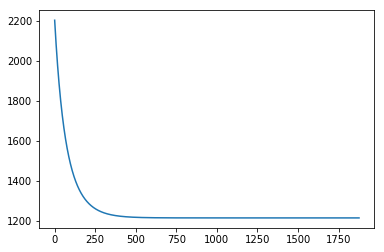

In [68]:
plt.plot(costs)